In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Train data 불러오기

In [4]:
train = pd.read_csv("Train_data.csv",na_values="na")

In [5]:
train.head()

,Unnamed: 0,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,52803,neg,41386,NaN,508.0,488.0,0.0,0.0,0.0,0.0,...,438088.0,202172.0,383094.0,392838.0,228526.0,104226.0,122526.0,6924.0,0.0,0.0
1,38189,neg,29616,NaN,1616.0,1490.0,0.0,0.0,0.0,0.0,...,145524.0,72858.0,171332.0,308328.0,379466.0,213826.0,5764.0,292.0,0.0,0.0
2,23291,neg,241352,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,3617298.0,2477772.0,3631902.0,997462.0,436380.0,202002.0,173850.0,1376.0,NaN,NaN
3,16862,neg,8100,NaN,86.0,76.0,0.0,0.0,0.0,0.0,...,66980.0,36658.0,91898.0,86634.0,60276.0,23616.0,7518.0,2.0,0.0,0.0
4,14055,neg,2290,NaN,636.0,448.0,0.0,0.0,0.0,0.0,...,11542.0,7394.0,14206.0,69592.0,3108.0,108.0,6.0,0.0,0.0,0.0


In [6]:
train.shape[0]

57000

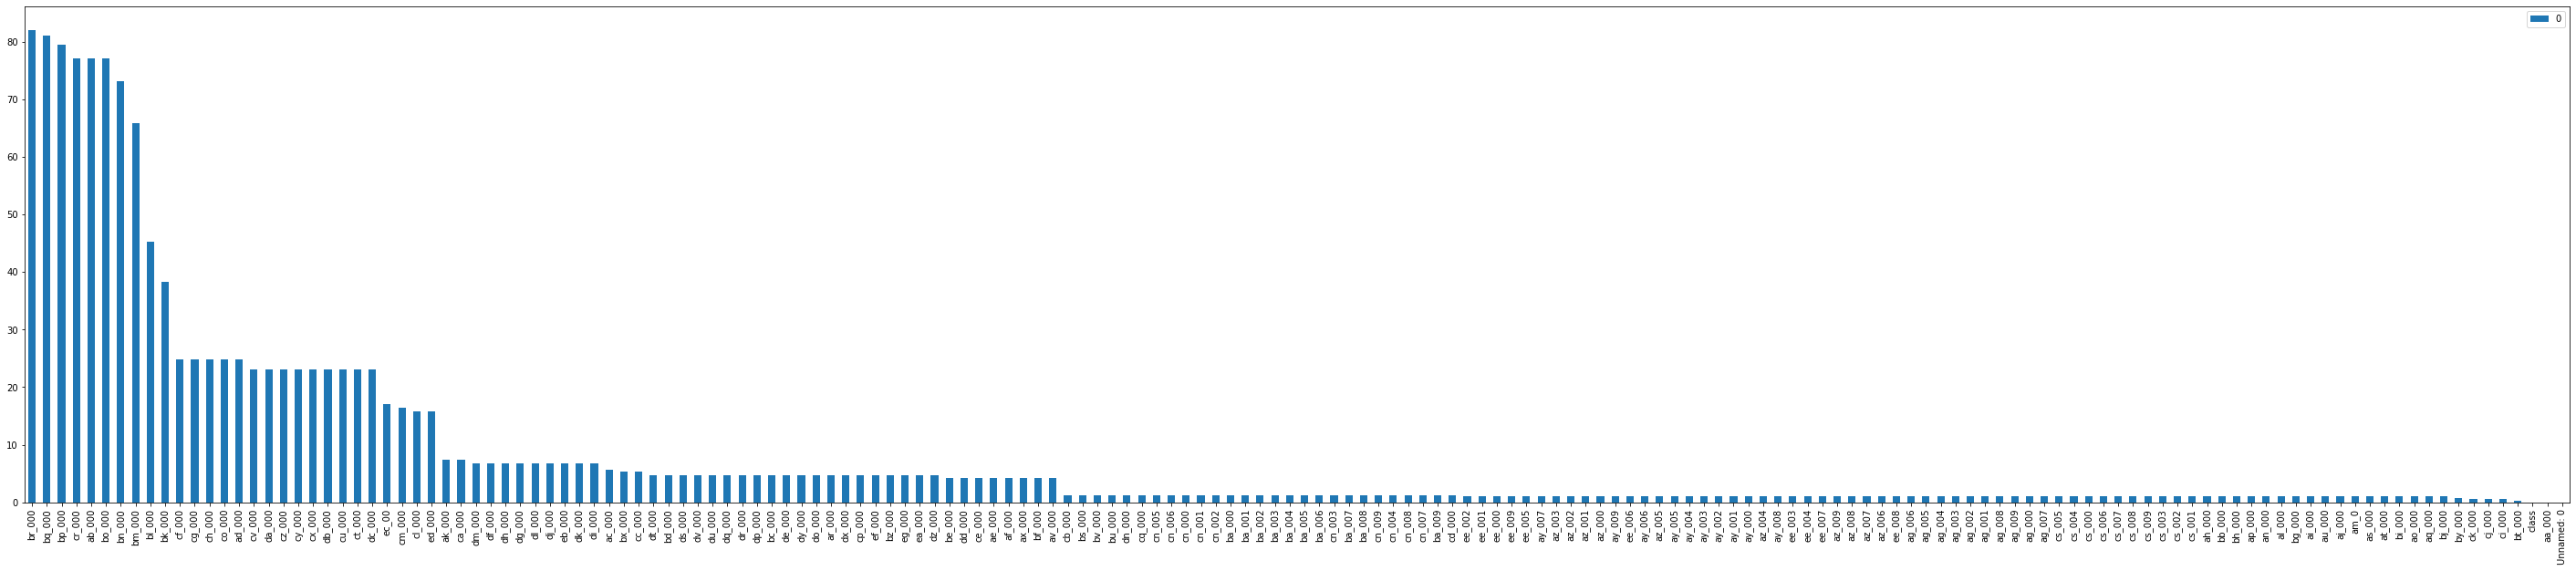

In [7]:
nan = train.isna().sum().div(train.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False) # 결측치 비율 확인
nan.plot.bar(figsize=(50,10))
plt.show()

In [8]:
cols_missing_50 = nan[nan[0]>50]
cols_missing_50

,0
br_000,82.059649
bq_000,81.121053
bp_000,79.456140
cr_000,77.171930
ab_000,77.171930
bo_000,77.161404
bn_000,73.222807
bm_000,65.884211


In [9]:
cols_to_drop = list(cols_missing_50.index)
cols_to_drop

['br_000',
 'bq_000',
 'bp_000',
 'cr_000',
 'ab_000',
 'bo_000',
 'bn_000',
 'bm_000']

In [10]:
train_set = train.drop(cols_to_drop, axis=1)

In [11]:
train_set

,Unnamed: 0,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,52803,neg,41386,5.080000e+02,488.0,0.0,0.0,0.0,0.0,0.0,...,438088.0,202172.0,383094.0,392838.0,228526.0,104226.0,122526.0,6924.0,0.0,0.0
1,38189,neg,29616,1.616000e+03,1490.0,0.0,0.0,0.0,0.0,0.0,...,145524.0,72858.0,171332.0,308328.0,379466.0,213826.0,5764.0,292.0,0.0,0.0
2,23291,neg,241352,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,3617298.0,2477772.0,3631902.0,997462.0,436380.0,202002.0,173850.0,1376.0,NaN,NaN
3,16862,neg,8100,8.600000e+01,76.0,0.0,0.0,0.0,0.0,0.0,...,66980.0,36658.0,91898.0,86634.0,60276.0,23616.0,7518.0,2.0,0.0,0.0
4,14055,neg,2290,6.360000e+02,448.0,0.0,0.0,0.0,0.0,0.0,...,11542.0,7394.0,14206.0,69592.0,3108.0,108.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,43966,neg,1476,1.340000e+02,108.0,0.0,0.0,0.0,0.0,0.0,...,8304.0,7138.0,53280.0,1590.0,210.0,38.0,98.0,0.0,0.0,0.0
56996,4128,neg,2,4.800000e+01,24.0,0.0,0.0,0.0,0.0,0.0,...,160.0,24.0,40.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0
56997,34715,pos,665870,3.040000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,407794.0,168822.0,452818.0,801402.0,1029832.0,1265422.0,28722.0,0.0,0.0,0.0
56998,56900,neg,40440,9.400000e+01,64.0,0.0,0.0,0.0,0.0,0.0,...,339622.0,179816.0,373162.0,276578.0,241092.0,162912.0,235174.0,10340.0,0.0,0.0


In [12]:
len(train_set.columns)

164

#### train, validation set split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(train_set, train_set['class'],
                                                   test_size = 0.2, random_state = 42,
                                                   stratify = train_set['class'])

In [15]:
X_train

,Unnamed: 0,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
36627,58126,neg,46976,1.280000e+02,124.0,0.0,0.0,0.0,0.0,0.0,...,176578.0,80224.0,141948.0,164404.0,1438208.0,32222.0,520.0,0.0,0.0,0.0
42898,72727,neg,39910,7.000000e+01,66.0,0.0,0.0,0.0,0.0,0.0,...,291494.0,110406.0,265298.0,254714.0,232414.0,182932.0,309914.0,264.0,0.0,0.0
23114,60535,neg,43614,1.520000e+02,144.0,0.0,0.0,0.0,0.0,0.0,...,314196.0,146948.0,297180.0,274392.0,247178.0,193972.0,320904.0,43452.0,0.0,0.0
2962,58060,neg,60,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,578.0,190.0,468.0,732.0,138.0,0.0,0.0,0.0,0.0,0.0
45204,57687,neg,38938,4.600000e+02,150.0,0.0,0.0,0.0,0.0,0.0,...,459428.0,220256.0,413674.0,334330.0,196244.0,92842.0,57548.0,268.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22448,41029,neg,16,3.400000e+01,6.0,0.0,0.0,0.0,0.0,0.0,...,286.0,68.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5638,63638,neg,42980,1.660000e+02,128.0,0.0,0.0,0.0,0.0,0.0,...,259926.0,134328.0,413012.0,1089582.0,25206.0,18984.0,14104.0,1472.0,0.0,0.0
32020,73897,neg,37912,2.130706e+09,1530.0,0.0,0.0,0.0,0.0,0.0,...,800648.0,312142.0,392076.0,168164.0,63434.0,25862.0,22036.0,24.0,0.0,0.0
9030,35723,neg,33856,1.318000e+03,1174.0,192.0,330.0,0.0,0.0,0.0,...,409354.0,477122.0,142826.0,110344.0,488910.0,2668.0,160.0,0.0,0.0,6.0


In [16]:
X_train = X_train.replace(np.nan, X_train.mean())

In [17]:
X_train

,Unnamed: 0,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
36627,58126,neg,46976,1.280000e+02,124.000000,0.0,0.0,0.0,0.0,0.0,...,176578.0,80224.0,141948.0,164404.0,1438208.0,32222.0,520.0,0.0,0.0,0.0
42898,72727,neg,39910,7.000000e+01,66.000000,0.0,0.0,0.0,0.0,0.0,...,291494.0,110406.0,265298.0,254714.0,232414.0,182932.0,309914.0,264.0,0.0,0.0
23114,60535,neg,43614,1.520000e+02,144.000000,0.0,0.0,0.0,0.0,0.0,...,314196.0,146948.0,297180.0,274392.0,247178.0,193972.0,320904.0,43452.0,0.0,0.0
2962,58060,neg,60,0.000000e+00,251086.976526,0.0,0.0,0.0,0.0,0.0,...,578.0,190.0,468.0,732.0,138.0,0.0,0.0,0.0,0.0,0.0
45204,57687,neg,38938,4.600000e+02,150.000000,0.0,0.0,0.0,0.0,0.0,...,459428.0,220256.0,413674.0,334330.0,196244.0,92842.0,57548.0,268.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22448,41029,neg,16,3.400000e+01,6.000000,0.0,0.0,0.0,0.0,0.0,...,286.0,68.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5638,63638,neg,42980,1.660000e+02,128.000000,0.0,0.0,0.0,0.0,0.0,...,259926.0,134328.0,413012.0,1089582.0,25206.0,18984.0,14104.0,1472.0,0.0,0.0
32020,73897,neg,37912,2.130706e+09,1530.000000,0.0,0.0,0.0,0.0,0.0,...,800648.0,312142.0,392076.0,168164.0,63434.0,25862.0,22036.0,24.0,0.0,0.0
9030,35723,neg,33856,1.318000e+03,1174.000000,192.0,330.0,0.0,0.0,0.0,...,409354.0,477122.0,142826.0,110344.0,488910.0,2668.0,160.0,0.0,0.0,6.0


In [18]:
X_train = X_train.drop(['Unnamed: 0', 'class'], axis=1)
X_train.reset_index(drop = True, inplace = True)
X_train

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,46976,1.280000e+02,124.000000,0.0,0.0,0.0,0.0,0.0,0.0,448938.0,...,176578.0,80224.0,141948.0,164404.0,1438208.0,32222.0,520.0,0.0,0.0,0.0
1,39910,7.000000e+01,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,1088.0,...,291494.0,110406.0,265298.0,254714.0,232414.0,182932.0,309914.0,264.0,0.0,0.0
2,43614,1.520000e+02,144.000000,0.0,0.0,0.0,0.0,0.0,0.0,9254.0,...,314196.0,146948.0,297180.0,274392.0,247178.0,193972.0,320904.0,43452.0,0.0,0.0
3,60,0.000000e+00,251086.976526,0.0,0.0,0.0,0.0,0.0,0.0,94.0,...,578.0,190.0,468.0,732.0,138.0,0.0,0.0,0.0,0.0,0.0
4,38938,4.600000e+02,150.000000,0.0,0.0,0.0,0.0,0.0,0.0,96.0,...,459428.0,220256.0,413674.0,334330.0,196244.0,92842.0,57548.0,268.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45595,16,3.400000e+01,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,632.0,...,286.0,68.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45596,42980,1.660000e+02,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,3154.0,...,259926.0,134328.0,413012.0,1089582.0,25206.0,18984.0,14104.0,1472.0,0.0,0.0
45597,37912,2.130706e+09,1530.000000,0.0,0.0,0.0,0.0,0.0,0.0,261278.0,...,800648.0,312142.0,392076.0,168164.0,63434.0,25862.0,22036.0,24.0,0.0,0.0
45598,33856,1.318000e+03,1174.000000,192.0,330.0,0.0,0.0,0.0,0.0,14004.0,...,409354.0,477122.0,142826.0,110344.0,488910.0,2668.0,160.0,0.0,0.0,6.0


In [19]:
y_train

36627    neg
42898    neg
23114    neg
2962     neg
45204    neg
        ... 
22448    neg
5638     neg
32020    neg
9030     neg
50505    neg
Name: class, Length: 45600, dtype: object

In [20]:
y_val

28199    neg
49371    pos
56441    neg
13775    neg
38520    neg
        ... 
13151    neg
30507    neg
43672    neg
30518    neg
6799     pos
Name: class, Length: 11400, dtype: object

In [21]:
X_val

,Unnamed: 0,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
28199,40348,neg,39034,132.0,108.0,0.0,0.0,0.0,0.0,0.0,...,154734.0,69690.0,165178.0,133902.0,443552.0,691076.0,6636.0,0.0,0.0,0.0
49371,19970,pos,349286,NaN,NaN,NaN,NaN,0.0,26204.0,735690.0,...,5012822.0,1532928.0,3381640.0,4543016.0,655000.0,207038.0,3480.0,0.0,NaN,NaN
56441,7008,neg,32400,714.0,626.0,0.0,0.0,0.0,0.0,0.0,...,320846.0,168344.0,408888.0,330388.0,153806.0,65222.0,52630.0,32.0,0.0,0.0
13775,69658,neg,378224,36.0,16.0,0.0,0.0,0.0,0.0,0.0,...,53412.0,24186.0,43278.0,37390.0,48242.0,293878.0,30980.0,194.0,0.0,0.0
38520,31183,neg,61174,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,417030.0,213806.0,466264.0,560570.0,527686.0,293296.0,224894.0,2752.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13151,59343,neg,30818,774.0,624.0,0.0,0.0,0.0,0.0,0.0,...,211896.0,112548.0,248956.0,304754.0,343216.0,141470.0,14940.0,0.0,0.0,0.0
30507,47253,neg,62496,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,709166.0,295914.0,490402.0,396500.0,268468.0,169826.0,334658.0,22344.0,0.0,0.0
43672,54476,neg,175162,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,1639368.0,1118648.0,2449552.0,1915304.0,774144.0,245922.0,127348.0,58.0,0.0,0.0
30518,31166,neg,63624,20.0,20.0,0.0,0.0,0.0,0.0,0.0,...,601960.0,226666.0,554386.0,941358.0,55188.0,55874.0,108.0,0.0,0.0,0.0


In [22]:
X_val = X_val.replace(np.nan, X_val.mean())
X_val = X_val.drop(['Unnamed: 0', 'class'], axis = 1)
X_val.reset_index(drop = True, inplace = True)
X_val

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,39034,1.320000e+02,108.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,10614.0,...,154734.0,69690.0,165178.0,133902.0,443552.0,691076.0,6636.0,0.0,0.000000,0.000000
1,349286,3.479357e+08,460.174055,7.35793,12.725771,0.0,26204.0,735690.0,6638176.0,15523300.0,...,5012822.0,1532928.0,3381640.0,4543016.0,655000.0,207038.0,3480.0,0.0,0.098627,0.235966
2,32400,7.140000e+02,626.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,1468.0,...,320846.0,168344.0,408888.0,330388.0,153806.0,65222.0,52630.0,32.0,0.000000,0.000000
3,378224,3.600000e+01,16.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,89034.0,...,53412.0,24186.0,43278.0,37390.0,48242.0,293878.0,30980.0,194.0,0.000000,0.000000
4,61174,0.000000e+00,460.174055,0.00000,0.000000,0.0,0.0,0.0,0.0,976.0,...,417030.0,213806.0,466264.0,560570.0,527686.0,293296.0,224894.0,2752.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,30818,7.740000e+02,624.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,8260.0,...,211896.0,112548.0,248956.0,304754.0,343216.0,141470.0,14940.0,0.0,0.000000,0.000000
11396,62496,0.000000e+00,460.174055,0.00000,0.000000,0.0,0.0,0.0,0.0,5062.0,...,709166.0,295914.0,490402.0,396500.0,268468.0,169826.0,334658.0,22344.0,0.000000,0.000000
11397,175162,0.000000e+00,460.174055,0.00000,0.000000,0.0,0.0,0.0,0.0,46810.0,...,1639368.0,1118648.0,2449552.0,1915304.0,774144.0,245922.0,127348.0,58.0,0.000000,0.000000
11398,63624,2.000000e+01,20.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,201030.0,...,601960.0,226666.0,554386.0,941358.0,55188.0,55874.0,108.0,0.0,0.000000,0.000000


#### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
# Fit on training set only.
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

#### PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [26]:
ratio = pca.explained_variance_ratio_

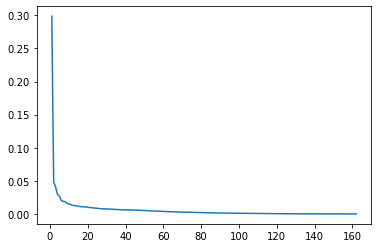

In [27]:
plt.plot(range(1,163),ratio)

In [28]:
cusum_ratio = [0]
for i in ratio:
    cusum = cusum_ratio[-1]+i
    cusum_ratio.append(cusum)

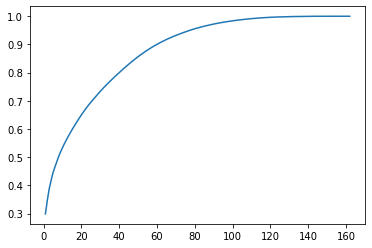

In [29]:
cusum_ratio=cusum_ratio[1:]
plt.plot(range(1,163),cusum_ratio)

In [30]:
pca = PCA(n_components=61)
pca.fit(X_train_scaled)

PCA(n_components=61)

In [31]:
print('explained variance ratio :', sum(pca.explained_variance_ratio_))

explained variance ratio : 0.903722412252041


In [32]:
pca_component = pca.fit_transform(X_train_scaled)
X_train_pca = pd.DataFrame(data=pca_component)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.575221,1.134071,-1.072540,0.193362,0.386716,0.641388,-0.673025,0.013854,-0.396641,1.190081,...,-0.286216,-0.018367,-0.113864,-0.115261,0.517955,-0.401423,-0.122899,0.367242,0.664620,-0.277297
1,-0.290070,-0.357221,0.126070,0.519604,-0.166828,-0.012768,-0.327135,-0.020440,0.531793,-0.341144,...,0.144064,0.022682,0.063328,0.150445,-0.140327,-0.101949,-0.103595,-0.168373,0.069501,-0.218047
2,-0.641508,-0.435298,-0.259103,-0.237481,0.471393,-0.212538,-0.966813,0.030608,-1.738606,1.665710,...,0.074170,-0.000565,0.037069,-0.038468,-0.221867,0.043902,0.034425,-0.083482,-0.028701,-0.234011
3,-3.036226,0.584424,0.498985,0.258336,-0.391732,0.249493,0.191922,-0.019848,0.735217,-0.983344,...,-0.092319,-0.004156,0.095611,-0.145573,0.067219,-0.141148,0.021165,0.074161,0.045568,-0.083035
4,-0.668264,-0.293205,-0.152759,0.332539,-0.045693,0.339489,0.114415,-0.026084,0.447056,-0.921650,...,0.200211,-0.148879,0.025078,0.260364,-0.047874,-0.022402,0.148659,0.058898,-0.144733,0.051520


In [33]:
X_val_pca = pca.transform(X_val_scaled)

#### SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
print("Before OverSampling, '1': {}".format(sum(y_train=='pos')))
print("Before OverSampling, '0': {}".format(sum(y_train=='neg')))

Before OverSampling, '1': 853
Before OverSampling, '0': 44747


In [36]:
smote = SMOTE(random_state = 42)
X_train_over, y_train_over = smote.fit_resample(X_train_pca, y_train)

print('After OverSampling, shape of X: {}'.format(X_train_over.shape))
print('After OverSampling, shape of y: {} \n'.format(y_train_over.shape))

print("After OverSampling, '1': {}".format(sum(y_train_over=='pos')))
print("After OverSampling, '0': {}".format(sum(y_train_over=='neg')))

After OverSampling, shape of X: (89494, 61)
After OverSampling, shape of y: (89494,) 

After OverSampling, '1': 44747
After OverSampling, '0': 44747


#### loss function

In [37]:
import numpy as np

def truckloss(y_true, y_pred):

    FP = np.logical_and(y_true == 'neg', y_pred == 'pos')
    FN = np.logical_and(y_true == 'pos', y_pred == 'neg')

    
    FPsum = sum(FP)
    FNsum = sum(FN)

    return FPsum*10 + FNsum*500

#### RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf.fit(X_train_over, y_train_over)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [39]:
y_pred_rf = rf.predict(X_val_pca)

In [40]:
from sklearn.metrics import accuracy_score, f1_score

print('f1 score:', f1_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_rf).replace({'neg': 0, 'pos' : 1})))
print('accuracy score:', accuracy_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_rf).replace({'neg': 0, 'pos' : 1})))

f1 score: 0.6691176470588235
accuracy score: 0.9842105263157894


In [41]:
truckloss(y_val, y_pred_rf)

16990

#### LogisticRegression(solver = 'sag')

In [212]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, random_state=42,
                        multi_class='multinomial',
                        solver = 'sag')
lr.fit(X_train_over, y_train_over)

C:\Users\Bomin\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=42,
                   solver='sag')

In [213]:
y_pred_lr = lr.predict(X_val_pca)

In [214]:
print('f1 score:', f1_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_lr).replace({'neg': 0, 'pos' : 1})))
print('accuracy score:', accuracy_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_lr).replace({'neg': 0, 'pos' : 1})))

f1 score: 0.5726872246696035
accuracy score: 0.9744736842105263


In [215]:
truckloss(y_val, y_pred_lr)

11730

#### CatBoost

In [216]:
from catboost import CatBoostClassifier

In [217]:
CB = CatBoostClassifier(random_state = 42)
CB.fit(X_train_over, y_train_over)

Learning rate set to 0.070202
0:	learn: 0.5927687	total: 26ms	remaining: 26s
1:	learn: 0.5104795	total: 50.6ms	remaining: 25.3s
2:	learn: 0.4401239	total: 75.5ms	remaining: 25.1s
3:	learn: 0.3884654	total: 99.7ms	remaining: 24.8s
4:	learn: 0.3421837	total: 125ms	remaining: 24.8s
5:	learn: 0.3103305	total: 151ms	remaining: 25s
6:	learn: 0.2809029	total: 176ms	remaining: 25s
7:	learn: 0.2566790	total: 207ms	remaining: 25.7s
8:	learn: 0.2381742	total: 233ms	remaining: 25.7s
9:	learn: 0.2230586	total: 258ms	remaining: 25.6s
10:	learn: 0.2089735	total: 284ms	remaining: 25.5s
11:	learn: 0.1976603	total: 309ms	remaining: 25.4s
12:	learn: 0.1888323	total: 334ms	remaining: 25.4s
13:	learn: 0.1790662	total: 360ms	remaining: 25.3s
14:	learn: 0.1714334	total: 390ms	remaining: 25.6s
15:	learn: 0.1642617	total: 415ms	remaining: 25.6s
16:	learn: 0.1579155	total: 441ms	remaining: 25.5s
17:	learn: 0.1528913	total: 467ms	remaining: 25.5s
18:	learn: 0.1485072	total: 493ms	remaining: 25.4s
19:	learn: 0.14

165:	learn: 0.0512923	total: 4.38s	remaining: 22s
166:	learn: 0.0510439	total: 4.41s	remaining: 22s
167:	learn: 0.0509640	total: 4.43s	remaining: 21.9s
168:	learn: 0.0507815	total: 4.45s	remaining: 21.9s
169:	learn: 0.0505113	total: 4.48s	remaining: 21.9s
170:	learn: 0.0504156	total: 4.5s	remaining: 21.8s
171:	learn: 0.0500404	total: 4.53s	remaining: 21.8s
172:	learn: 0.0497037	total: 4.56s	remaining: 21.8s
173:	learn: 0.0494394	total: 4.58s	remaining: 21.8s
174:	learn: 0.0493728	total: 4.61s	remaining: 21.7s
175:	learn: 0.0491470	total: 4.63s	remaining: 21.7s
176:	learn: 0.0490306	total: 4.66s	remaining: 21.7s
177:	learn: 0.0488256	total: 4.69s	remaining: 21.7s
178:	learn: 0.0486645	total: 4.73s	remaining: 21.7s
179:	learn: 0.0482499	total: 4.76s	remaining: 21.7s
180:	learn: 0.0479652	total: 4.79s	remaining: 21.7s
181:	learn: 0.0477892	total: 4.82s	remaining: 21.6s
182:	learn: 0.0476423	total: 4.84s	remaining: 21.6s
183:	learn: 0.0473277	total: 4.87s	remaining: 21.6s
184:	learn: 0.047

327:	learn: 0.0278070	total: 8.75s	remaining: 17.9s
328:	learn: 0.0276931	total: 8.78s	remaining: 17.9s
329:	learn: 0.0276039	total: 8.81s	remaining: 17.9s
330:	learn: 0.0275149	total: 8.84s	remaining: 17.9s
331:	learn: 0.0274295	total: 8.86s	remaining: 17.8s
332:	learn: 0.0272642	total: 8.89s	remaining: 17.8s
333:	learn: 0.0271844	total: 8.92s	remaining: 17.8s
334:	learn: 0.0269612	total: 8.95s	remaining: 17.8s
335:	learn: 0.0267864	total: 8.97s	remaining: 17.7s
336:	learn: 0.0267322	total: 9s	remaining: 17.7s
337:	learn: 0.0266598	total: 9.03s	remaining: 17.7s
338:	learn: 0.0265873	total: 9.05s	remaining: 17.7s
339:	learn: 0.0264522	total: 9.08s	remaining: 17.6s
340:	learn: 0.0263450	total: 9.11s	remaining: 17.6s
341:	learn: 0.0262497	total: 9.14s	remaining: 17.6s
342:	learn: 0.0261652	total: 9.16s	remaining: 17.6s
343:	learn: 0.0260712	total: 9.19s	remaining: 17.5s
344:	learn: 0.0260354	total: 9.21s	remaining: 17.5s
345:	learn: 0.0259996	total: 9.24s	remaining: 17.5s
346:	learn: 0.0

486:	learn: 0.0164769	total: 13.1s	remaining: 13.8s
487:	learn: 0.0164489	total: 13.2s	remaining: 13.8s
488:	learn: 0.0164004	total: 13.2s	remaining: 13.8s
489:	learn: 0.0163714	total: 13.2s	remaining: 13.7s
490:	learn: 0.0163343	total: 13.2s	remaining: 13.7s
491:	learn: 0.0163035	total: 13.3s	remaining: 13.7s
492:	learn: 0.0162706	total: 13.3s	remaining: 13.7s
493:	learn: 0.0161908	total: 13.3s	remaining: 13.6s
494:	learn: 0.0161267	total: 13.3s	remaining: 13.6s
495:	learn: 0.0160636	total: 13.4s	remaining: 13.6s
496:	learn: 0.0159772	total: 13.4s	remaining: 13.6s
497:	learn: 0.0159317	total: 13.4s	remaining: 13.5s
498:	learn: 0.0159128	total: 13.4s	remaining: 13.5s
499:	learn: 0.0158521	total: 13.5s	remaining: 13.5s
500:	learn: 0.0158039	total: 13.5s	remaining: 13.5s
501:	learn: 0.0157839	total: 13.5s	remaining: 13.4s
502:	learn: 0.0157364	total: 13.6s	remaining: 13.4s
503:	learn: 0.0156927	total: 13.6s	remaining: 13.4s
504:	learn: 0.0156389	total: 13.6s	remaining: 13.3s
505:	learn: 

645:	learn: 0.0106276	total: 17.6s	remaining: 9.62s
646:	learn: 0.0106127	total: 17.6s	remaining: 9.59s
647:	learn: 0.0105908	total: 17.6s	remaining: 9.56s
648:	learn: 0.0105493	total: 17.6s	remaining: 9.54s
649:	learn: 0.0105185	total: 17.7s	remaining: 9.51s
650:	learn: 0.0105095	total: 17.7s	remaining: 9.48s
651:	learn: 0.0104739	total: 17.7s	remaining: 9.46s
652:	learn: 0.0104414	total: 17.7s	remaining: 9.43s
653:	learn: 0.0104212	total: 17.8s	remaining: 9.4s
654:	learn: 0.0104146	total: 17.8s	remaining: 9.38s
655:	learn: 0.0103977	total: 17.8s	remaining: 9.35s
656:	learn: 0.0103599	total: 17.9s	remaining: 9.32s
657:	learn: 0.0103328	total: 17.9s	remaining: 9.29s
658:	learn: 0.0103127	total: 17.9s	remaining: 9.27s
659:	learn: 0.0102784	total: 17.9s	remaining: 9.25s
660:	learn: 0.0102580	total: 18s	remaining: 9.22s
661:	learn: 0.0102007	total: 18s	remaining: 9.2s
662:	learn: 0.0101727	total: 18s	remaining: 9.17s
663:	learn: 0.0101366	total: 18.1s	remaining: 9.14s
664:	learn: 0.010119

804:	learn: 0.0074072	total: 21.9s	remaining: 5.31s
805:	learn: 0.0073941	total: 21.9s	remaining: 5.28s
806:	learn: 0.0073748	total: 22s	remaining: 5.25s
807:	learn: 0.0073748	total: 22s	remaining: 5.22s
808:	learn: 0.0073530	total: 22s	remaining: 5.2s
809:	learn: 0.0073433	total: 22s	remaining: 5.17s
810:	learn: 0.0073220	total: 22.1s	remaining: 5.14s
811:	learn: 0.0073220	total: 22.1s	remaining: 5.12s
812:	learn: 0.0073220	total: 22.1s	remaining: 5.09s
813:	learn: 0.0073052	total: 22.1s	remaining: 5.06s
814:	learn: 0.0073052	total: 22.2s	remaining: 5.03s
815:	learn: 0.0073052	total: 22.2s	remaining: 5s
816:	learn: 0.0073052	total: 22.2s	remaining: 4.97s
817:	learn: 0.0073052	total: 22.2s	remaining: 4.95s
818:	learn: 0.0073051	total: 22.2s	remaining: 4.92s
819:	learn: 0.0073051	total: 22.3s	remaining: 4.89s
820:	learn: 0.0073051	total: 22.3s	remaining: 4.86s
821:	learn: 0.0073051	total: 22.3s	remaining: 4.83s
822:	learn: 0.0072949	total: 22.3s	remaining: 4.8s
823:	learn: 0.0072826	tot

966:	learn: 0.0067505	total: 25.7s	remaining: 876ms
967:	learn: 0.0067505	total: 25.7s	remaining: 850ms
968:	learn: 0.0067505	total: 25.7s	remaining: 823ms
969:	learn: 0.0067505	total: 25.7s	remaining: 796ms
970:	learn: 0.0067505	total: 25.8s	remaining: 770ms
971:	learn: 0.0067505	total: 25.8s	remaining: 743ms
972:	learn: 0.0067505	total: 25.8s	remaining: 716ms
973:	learn: 0.0067505	total: 25.8s	remaining: 690ms
974:	learn: 0.0067505	total: 25.9s	remaining: 663ms
975:	learn: 0.0067505	total: 25.9s	remaining: 637ms
976:	learn: 0.0067505	total: 25.9s	remaining: 610ms
977:	learn: 0.0067505	total: 25.9s	remaining: 584ms
978:	learn: 0.0067505	total: 26s	remaining: 557ms
979:	learn: 0.0067505	total: 26s	remaining: 530ms
980:	learn: 0.0067505	total: 26s	remaining: 504ms
981:	learn: 0.0067505	total: 26s	remaining: 477ms
982:	learn: 0.0067504	total: 26s	remaining: 450ms
983:	learn: 0.0067504	total: 26.1s	remaining: 424ms
984:	learn: 0.0067504	total: 26.1s	remaining: 397ms
985:	learn: 0.0067504	

In [218]:
y_pred_CB = CB.predict(X_val_pca)

In [219]:
print('f1 score:', f1_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_CB).replace({'neg': 0, 'pos' : 1})))
print('accuracy score:', accuracy_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_CB).replace({'neg': 0, 'pos' : 1})))

f1 score: 0.6978557504873295
accuracy score: 0.9864035087719298


In [220]:
truckloss(y_val, y_pred_CB)

18210

#### Linear SVC

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [67]:
Linear_svm_clf =Pipeline((
    ("linear_svc", LinearSVC(C=0.1, loss="hinge")),
))                                                     
Linear_svm_clf.fit(X_train_over, y_train_over)

C:\Users\Bomin\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('linear_svc', LinearSVC(C=0.1, loss='hinge'))])

In [68]:
y_pred_svc = Linear_svm_clf.predict(X_val_pca)

In [69]:
print('f1 score:', f1_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_svc).replace({'neg': 0, 'pos' : 1})))
print('accuracy score:', accuracy_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_svc).replace({'neg': 0, 'pos' : 1})))

f1 score: 0.5145888594164456
accuracy score: 0.9678947368421053


In [70]:
truckloss(y_val, y_pred_svc)

12970

#### LogisticRegression(solver = "lbfgs")

In [43]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X_train_over, y_train_over)

C:\Users\Bomin\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [44]:
y_pred_softmax = softmax_reg.predict(X_val_pca)

In [45]:
print('f1 score:', f1_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_softmax).replace({'neg': 0, 'pos' : 1})))
print('accuracy score:', accuracy_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_softmax).replace({'neg': 0, 'pos' : 1})))

f1 score: 0.5689404934687954
accuracy score: 0.9739473684210527


In [46]:
truckloss(y_val, y_pred_softmax)

11300

#### AdaBoost

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [73]:
y_pred_ada = ada_clf.predict(X_val_pca)

In [74]:
print('f1 score:', f1_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_ada).replace({'neg': 0, 'pos' : 1})))
print('accuracy score:', accuracy_score(y_val.replace({'neg': 0, 'pos' : 1}), pd.Series(y_pred_ada).replace({'neg': 0, 'pos' : 1})))

f1 score: 0.44866071428571425
accuracy score: 0.9566666666666667


In [75]:
truckloss(y_val, y_pred_ada)

10820

#### Test set 불러오기

In [47]:
test = pd.read_csv("Test_data.csv", na_values="na")

In [48]:
test

,Unnamed: 0,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,4,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
1,11,39196,NaN,2.040000e+02,170.0,0.0,0.0,0.0,0.0,0.0,...,198386.0,99614.0,215734.0,189966.0,219996.0,208724.0,463790.0,34054.0,0.0,0.0
2,17,31300,0.0,7.840000e+02,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
3,18,736,2.0,2.400000e+01,22.0,16.0,20.0,0.0,0.0,0.0,...,1370.0,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0
4,25,58246,NaN,2.130706e+09,2416.0,0.0,0.0,0.0,0.0,0.0,...,670578.0,293816.0,464286.0,336782.0,229078.0,163348.0,372036.0,31152.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,75979,1138,0.0,4.400000e+01,NaN,0.0,0.0,0.0,0.0,962.0,...,5052.0,1950.0,5690.0,9174.0,15966.0,11682.0,46.0,0.0,0.0,0.0
18996,75985,136186,NaN,2.130706e+09,2226.0,0.0,0.0,0.0,0.0,0.0,...,1618760.0,723430.0,1252324.0,882944.0,630434.0,386472.0,553690.0,49346.0,0.0,0.0
18997,75987,186,NaN,1.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,...,1050.0,1298.0,2758.0,982.0,1112.0,768.0,0.0,0.0,0.0,0.0
18998,75999,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [49]:
X_test = test.replace(np.nan, test.mean())
X_test = X_test.drop(['Unnamed: 0'], axis = 1)
X_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
1,39196,0.740223,2.040000e+02,170.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,198386.0,99614.0,215734.0,189966.0,219996.0,208724.0,463790.0,34054.0,0.0,0.0
2,31300,0.000000,7.840000e+02,740.000000,0.0,0.0,0.0,0.0,0.0,20386.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
3,736,2.000000,2.400000e+01,22.000000,16.0,20.0,0.0,0.0,0.0,1144.0,...,1370.0,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0
4,58246,0.740223,2.130706e+09,2416.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,670578.0,293816.0,464286.0,336782.0,229078.0,163348.0,372036.0,31152.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,1138,0.000000,4.400000e+01,420.885603,0.0,0.0,0.0,0.0,962.0,26932.0,...,5052.0,1950.0,5690.0,9174.0,15966.0,11682.0,46.0,0.0,0.0,0.0
18996,136186,0.740223,2.130706e+09,2226.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1618760.0,723430.0,1252324.0,882944.0,630434.0,386472.0,553690.0,49346.0,0.0,0.0
18997,186,0.740223,1.400000e+01,14.000000,0.0,0.0,0.0,0.0,0.0,8498.0,...,1050.0,1298.0,2758.0,982.0,1112.0,768.0,0.0,0.0,0.0,0.0
18998,110,0.740223,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [50]:
X_test = X_test.drop(cols_to_drop, axis=1)

In [51]:
X_test_scaled = scaler.transform(X_test)

In [52]:
X_test_pca = pca.transform(X_test_scaled)

In [53]:
class_pred_softmax = softmax_reg.predict(X_test_pca)

In [54]:
class_pred_softmax

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [55]:
len(class_pred_softmax)

19000

In [56]:
column_name = ["class"]

In [57]:
class_pred_softmax_df = pd.DataFrame(class_pred_softmax, columns = column_name)

In [58]:
class_pred_softmax_df

,class
0,neg
1,neg
2,neg
3,neg
4,neg
...,...
18995,neg
18996,neg
18997,neg
18998,neg


In [59]:
class_pred_softmax_df['class'].value_counts()

neg    18249
pos      751
Name: class, dtype: int64

In [60]:
test['class'] = class_pred_softmax_df['class']

In [61]:
test

,Unnamed: 0,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,4,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,neg
1,11,39196,NaN,2.040000e+02,170.0,0.0,0.0,0.0,0.0,0.0,...,99614.0,215734.0,189966.0,219996.0,208724.0,463790.0,34054.0,0.0,0.0,neg
2,17,31300,0.0,7.840000e+02,740.0,0.0,0.0,0.0,0.0,0.0,...,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0,neg
3,18,736,2.0,2.400000e+01,22.0,16.0,20.0,0.0,0.0,0.0,...,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0,neg
4,25,58246,NaN,2.130706e+09,2416.0,0.0,0.0,0.0,0.0,0.0,...,293816.0,464286.0,336782.0,229078.0,163348.0,372036.0,31152.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,75979,1138,0.0,4.400000e+01,NaN,0.0,0.0,0.0,0.0,962.0,...,1950.0,5690.0,9174.0,15966.0,11682.0,46.0,0.0,0.0,0.0,neg
18996,75985,136186,NaN,2.130706e+09,2226.0,0.0,0.0,0.0,0.0,0.0,...,723430.0,1252324.0,882944.0,630434.0,386472.0,553690.0,49346.0,0.0,0.0,neg
18997,75987,186,NaN,1.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,...,1298.0,2758.0,982.0,1112.0,768.0,0.0,0.0,0.0,0.0,neg
18998,75999,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,neg


In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
test['class'] = labelencoder.fit_transform(test['class'])

In [63]:
test

,Unnamed: 0,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,4,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,0
1,11,39196,NaN,2.040000e+02,170.0,0.0,0.0,0.0,0.0,0.0,...,99614.0,215734.0,189966.0,219996.0,208724.0,463790.0,34054.0,0.0,0.0,0
2,17,31300,0.0,7.840000e+02,740.0,0.0,0.0,0.0,0.0,0.0,...,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0,0
3,18,736,2.0,2.400000e+01,22.0,16.0,20.0,0.0,0.0,0.0,...,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0,0
4,25,58246,NaN,2.130706e+09,2416.0,0.0,0.0,0.0,0.0,0.0,...,293816.0,464286.0,336782.0,229078.0,163348.0,372036.0,31152.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,75979,1138,0.0,4.400000e+01,NaN,0.0,0.0,0.0,0.0,962.0,...,1950.0,5690.0,9174.0,15966.0,11682.0,46.0,0.0,0.0,0.0,0
18996,75985,136186,NaN,2.130706e+09,2226.0,0.0,0.0,0.0,0.0,0.0,...,723430.0,1252324.0,882944.0,630434.0,386472.0,553690.0,49346.0,0.0,0.0,0
18997,75987,186,NaN,1.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,...,1298.0,2758.0,982.0,1112.0,768.0,0.0,0.0,0.0,0.0,0
18998,75999,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,0


In [65]:
test['class'].value_counts()

0    18249
1      751
Name: class, dtype: int64

In [64]:
test.to_csv("result_data.csv")

In [77]:
test2 = pd.read_csv("Test_data.csv", na_values="na")

In [78]:
test2

,Unnamed: 0,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,4,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
1,11,39196,NaN,2.040000e+02,170.0,0.0,0.0,0.0,0.0,0.0,...,198386.0,99614.0,215734.0,189966.0,219996.0,208724.0,463790.0,34054.0,0.0,0.0
2,17,31300,0.0,7.840000e+02,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
3,18,736,2.0,2.400000e+01,22.0,16.0,20.0,0.0,0.0,0.0,...,1370.0,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0
4,25,58246,NaN,2.130706e+09,2416.0,0.0,0.0,0.0,0.0,0.0,...,670578.0,293816.0,464286.0,336782.0,229078.0,163348.0,372036.0,31152.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,75979,1138,0.0,4.400000e+01,NaN,0.0,0.0,0.0,0.0,962.0,...,5052.0,1950.0,5690.0,9174.0,15966.0,11682.0,46.0,0.0,0.0,0.0
18996,75985,136186,NaN,2.130706e+09,2226.0,0.0,0.0,0.0,0.0,0.0,...,1618760.0,723430.0,1252324.0,882944.0,630434.0,386472.0,553690.0,49346.0,0.0,0.0
18997,75987,186,NaN,1.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,...,1050.0,1298.0,2758.0,982.0,1112.0,768.0,0.0,0.0,0.0,0.0
18998,75999,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [79]:
X_test2 = test2.replace(np.nan, test.mean())
X_test2 = X_test2.drop(['Unnamed: 0'], axis = 1)
X_test2

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
1,39196,0.740223,2.040000e+02,170.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,198386.0,99614.0,215734.0,189966.0,219996.0,208724.0,463790.0,34054.0,0.0,0.0
2,31300,0.000000,7.840000e+02,740.000000,0.0,0.0,0.0,0.0,0.0,20386.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
3,736,2.000000,2.400000e+01,22.000000,16.0,20.0,0.0,0.0,0.0,1144.0,...,1370.0,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0
4,58246,0.740223,2.130706e+09,2416.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,670578.0,293816.0,464286.0,336782.0,229078.0,163348.0,372036.0,31152.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,1138,0.000000,4.400000e+01,420.885603,0.0,0.0,0.0,0.0,962.0,26932.0,...,5052.0,1950.0,5690.0,9174.0,15966.0,11682.0,46.0,0.0,0.0,0.0
18996,136186,0.740223,2.130706e+09,2226.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1618760.0,723430.0,1252324.0,882944.0,630434.0,386472.0,553690.0,49346.0,0.0,0.0
18997,186,0.740223,1.400000e+01,14.000000,0.0,0.0,0.0,0.0,0.0,8498.0,...,1050.0,1298.0,2758.0,982.0,1112.0,768.0,0.0,0.0,0.0,0.0
18998,110,0.740223,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [80]:
X_test2 = X_test2.drop(cols_to_drop, axis=1)

In [81]:
X_test2_scaled = scaler.transform(X_test2)

In [82]:
X_test2_pca = pca.transform(X_test2_scaled)

In [83]:
class_pred_ada = ada_clf.predict(X_test2_pca)

In [84]:
class_pred_ada

array(['neg', 'neg', 'pos', ..., 'neg', 'neg', 'neg'], dtype=object)

In [86]:
len(class_pred_ada)

19000

In [87]:
column_name = ["class"]

In [88]:
class_pred_ada_df = pd.DataFrame(class_pred_ada, columns = column_name)

In [89]:
class_pred_ada_df

,class
0,neg
1,neg
2,pos
3,neg
4,neg
...,...
18995,neg
18996,neg
18997,neg
18998,neg


In [90]:
class_pred_ada_df['class'].value_counts()

neg    17923
pos     1077
Name: class, dtype: int64

In [91]:
test2['class'] = class_pred_ada_df['class']

In [92]:
test2

,Unnamed: 0,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,4,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,neg
1,11,39196,NaN,2.040000e+02,170.0,0.0,0.0,0.0,0.0,0.0,...,99614.0,215734.0,189966.0,219996.0,208724.0,463790.0,34054.0,0.0,0.0,neg
2,17,31300,0.0,7.840000e+02,740.0,0.0,0.0,0.0,0.0,0.0,...,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0,pos
3,18,736,2.0,2.400000e+01,22.0,16.0,20.0,0.0,0.0,0.0,...,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0,neg
4,25,58246,NaN,2.130706e+09,2416.0,0.0,0.0,0.0,0.0,0.0,...,293816.0,464286.0,336782.0,229078.0,163348.0,372036.0,31152.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,75979,1138,0.0,4.400000e+01,NaN,0.0,0.0,0.0,0.0,962.0,...,1950.0,5690.0,9174.0,15966.0,11682.0,46.0,0.0,0.0,0.0,neg
18996,75985,136186,NaN,2.130706e+09,2226.0,0.0,0.0,0.0,0.0,0.0,...,723430.0,1252324.0,882944.0,630434.0,386472.0,553690.0,49346.0,0.0,0.0,neg
18997,75987,186,NaN,1.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,...,1298.0,2758.0,982.0,1112.0,768.0,0.0,0.0,0.0,0.0,neg
18998,75999,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,neg


In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
test2['class'] = labelencoder.fit_transform(test2['class'])

In [94]:
test2

,Unnamed: 0,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,4,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,0
1,11,39196,NaN,2.040000e+02,170.0,0.0,0.0,0.0,0.0,0.0,...,99614.0,215734.0,189966.0,219996.0,208724.0,463790.0,34054.0,0.0,0.0,0
2,17,31300,0.0,7.840000e+02,740.0,0.0,0.0,0.0,0.0,0.0,...,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0,1
3,18,736,2.0,2.400000e+01,22.0,16.0,20.0,0.0,0.0,0.0,...,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0,0
4,25,58246,NaN,2.130706e+09,2416.0,0.0,0.0,0.0,0.0,0.0,...,293816.0,464286.0,336782.0,229078.0,163348.0,372036.0,31152.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,75979,1138,0.0,4.400000e+01,NaN,0.0,0.0,0.0,0.0,962.0,...,1950.0,5690.0,9174.0,15966.0,11682.0,46.0,0.0,0.0,0.0,0
18996,75985,136186,NaN,2.130706e+09,2226.0,0.0,0.0,0.0,0.0,0.0,...,723430.0,1252324.0,882944.0,630434.0,386472.0,553690.0,49346.0,0.0,0.0,0
18997,75987,186,NaN,1.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,...,1298.0,2758.0,982.0,1112.0,768.0,0.0,0.0,0.0,0.0,0
18998,75999,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,0


In [95]:
test2['class'].value_counts()

0    17923
1     1077
Name: class, dtype: int64

In [96]:
test2.to_csv("result_data2.csv")